In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Getting the data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(heart_disease)

303

In [5]:
# Clearning the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Splitting data into 2 segments of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
len(X_train), len(X_test)

(242, 61)

In [7]:
# Instantiate the model
clf = RandomForestClassifier().fit(X_train, y_train)

# Test data on known datasets
clf.score(X_train, y_train)

1.0

In [8]:
# Test data on unknown datasets
clf.score(X_test, y_test)

0.8032786885245902

In [9]:
# Save model
dump(clf, "research.joblib")

['research.joblib']

In [10]:
# Load the saved model
saved_clf = load("research.joblib")
clf.score(X_test, y_test)

0.8032786885245902

In [11]:
# Get predictions
y_pred = clf.predict(X_test)

In [12]:
# Reindex the new dataframe created from unseen data
new_df = pd.DataFrame(X_test.reset_index(drop=True))
new_df["target"] = pd.Series(y_pred)

In [13]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
1,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
2,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
3,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
4,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1


In [19]:
len(new_df)

61

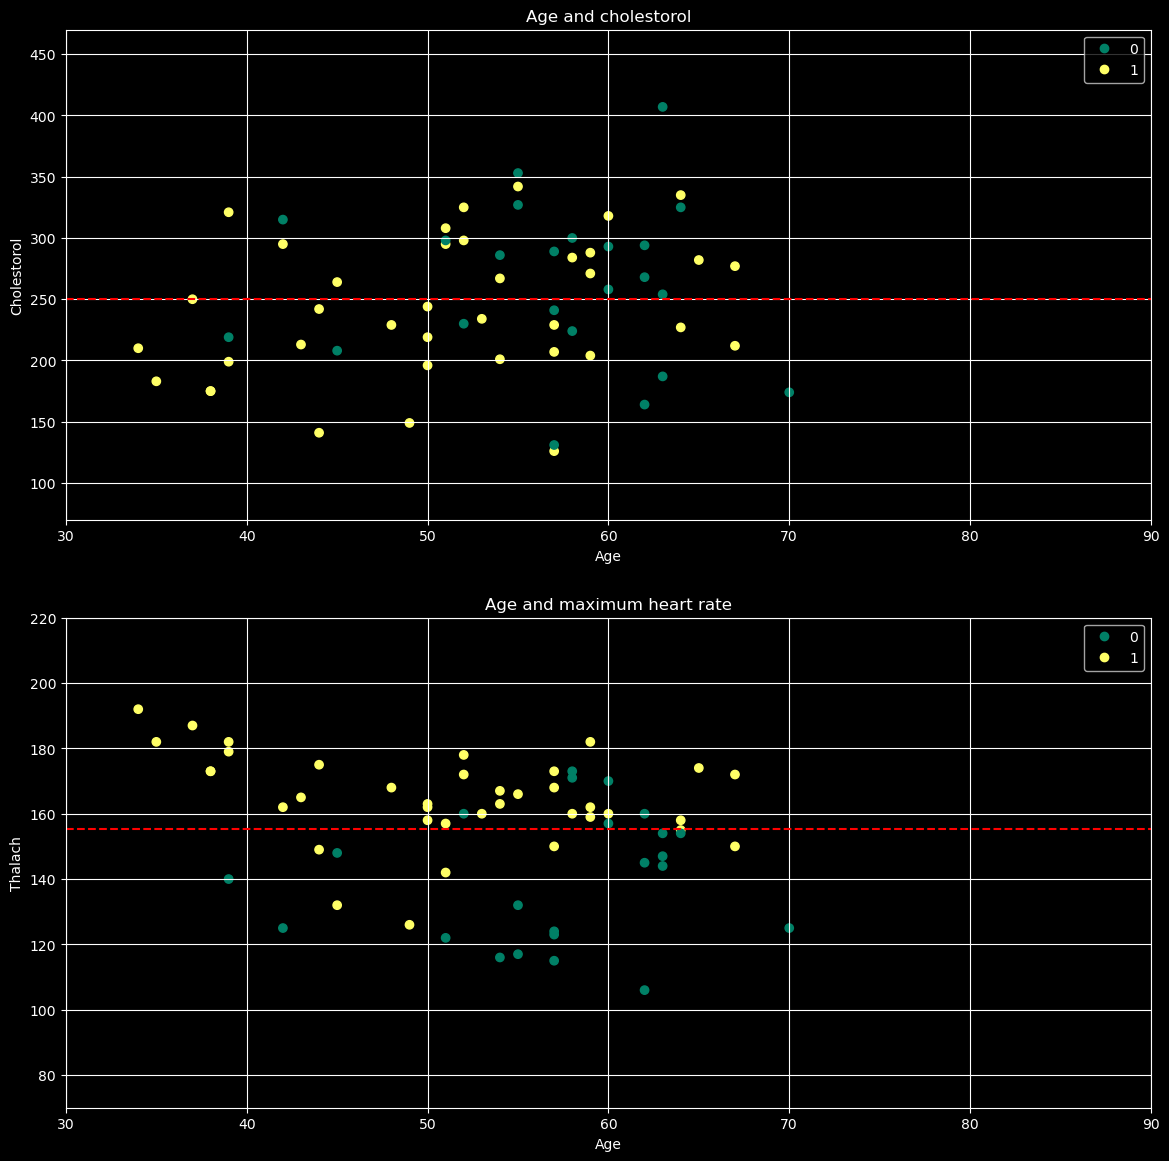

In [18]:
# Plot the new data

plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))
ax1_scatter = ax1.scatter(new_df["age"], new_df["chol"], c=new_df["target"], cmap="summer")
ax1.set(xlabel="Age", ylabel="Cholestorol", 
        title="Age and cholestorol",
       xlim=[30, 90], ylim=[70, 470])
ax1.legend(*ax1_scatter.legend_elements())
ax1.grid()
ax1.axhline(new_df["chol"].mean(), linestyle="--", c="red")

ax2_scatter = ax2.scatter(new_df["age"], new_df["thalach"], c=new_df["target"], cmap="summer")
ax2.set(xlabel="Age", ylabel="Thalach", title="Age and maximum heart rate",
       xlim=[30, 90], ylim=[70, 220], fontsize=)
ax2.legend(*ax2_scatter.legend_elements())
ax2.grid()
ax2.axhline(new_df["thalach"].mean(), linestyle="--", c="red");